# Lab 2 - Week 6 IST 718 : Alex Bernal #

In [298]:
## SAMPLE TIME SERIES USING RETAIL DATA
## BASED ON MILLER (2015) and BROWNLEE (2016)
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt  # 2D plotting
from pandas import Series
%matplotlib inline
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from math import sqrt
from pandas import DataFrame
from scipy.stats import boxcox
from matplotlib import pyplot
import warnings
import itertools
warnings.filterwarnings("ignore")

### Objective : Can we predict which three zip codes provide the best investment opportunity?

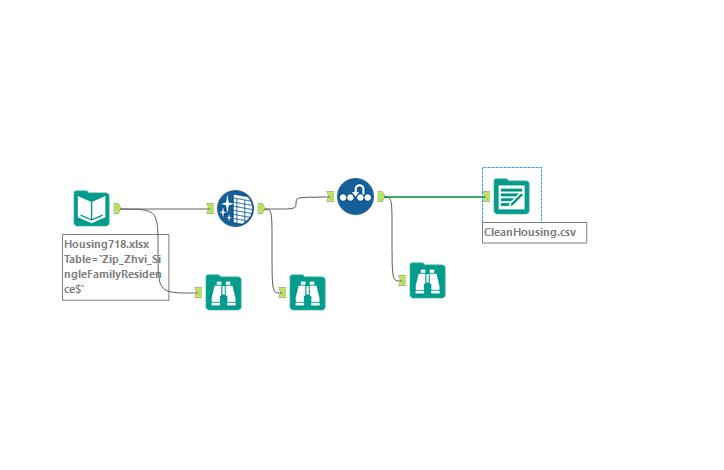

In [299]:
#Data prep
# Cleaned, inputed, Transposed
from IPython.display import Image
Image(filename='Clean.PNG') 

In [300]:
#Isolate Hotsprings Little Rock, and Fayetteville
#view full data first
df = pd.read_csv("HousingTransposed.csv")
df.head()

,Date,All,88648,88649,88663,88685,94227,94241,94248,94265,...,91404,98383,98464,98473,98512,94925,94926,94940,94941,94943
0,4/4/1996,66900,51900,62000,59300.00000,64000,186100,100900,129700,152500,...,55600,140500,132700,192900,134900,70100,70300,72900,83600,81900
1,4/5/1996,67150,52000,62000,59333.33333,64000,185900,100900,129600,153000,...,55500,141000,132200,192300,135000,71000,71200,73500,84300,82300
2,4/6/1996,67300,52000,62000,59366.66667,64100,185900,100900,129400,153600,...,55500,141500,131600,191600,134800,71800,72000,74000,85000,82600
3,4/7/1996,67550,52100,62000,59400.00000,64100,185900,100900,129300,154300,...,55400,142000,130700,190900,134300,72500,72700,74400,85500,83000
4,4/8/1996,67700,52100,61900,59366.66667,64100,186100,101100,129300,155100,...,55300,142500,129600,190200,133800,73200,73500,74900,85900,83300


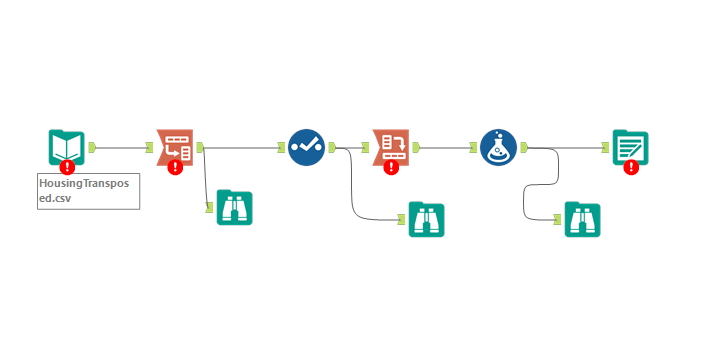

In [301]:
### Alteryx
#Data prep
# Cleaned, inputed, Transposed
from IPython.display import Image
Image(filename='FinalClean.jpg') 

### Alteryx
- Transposed, 
- Select * Where metro = ('Hot Springs', 'Little Rock', 'Fayetteville', 'Searcy')
- Cross Tab back
- Create Groupby Averages
- Crop and Export

In [302]:
df2 = pd.read_csv("HousingTSClean.csv")
df2.head()

,Date,Fay_Avg,LR_Avg,HS_avg,Srcy_Avg
0,4/1/1996,74089,89972,61775,60640
1,5/1/1996,74855,90357,61600,66767
2,6/1/1996,75024,90450,61375,66900
3,7/1/1996,75221,90497,61175,67050
4,8/1/1996,75426,90500,61000,67183


In [303]:
# Develop Models for forecasting Avg median Housing value for 2018

In [304]:
#Convert to Datetime
df2['Date'] = pd.to_datetime(df2['Date'])
df2.tail()

,Date,Fay_Avg,LR_Avg,HS_avg,Srcy_Avg
265,2018-05-01,148358,173363,119575,101833
266,2018-06-01,148958,174270,120100,102067
267,2018-07-01,149568,174883,121175,102200
268,2018-08-01,150179,175393,122975,102233
269,2018-09-01,150597,175770,124400,102383


In [305]:
df2 = df2.set_index('Date')
df2.index

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01',
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01'],
              dtype='datetime64[ns]', name='Date', length=270, freq=None)

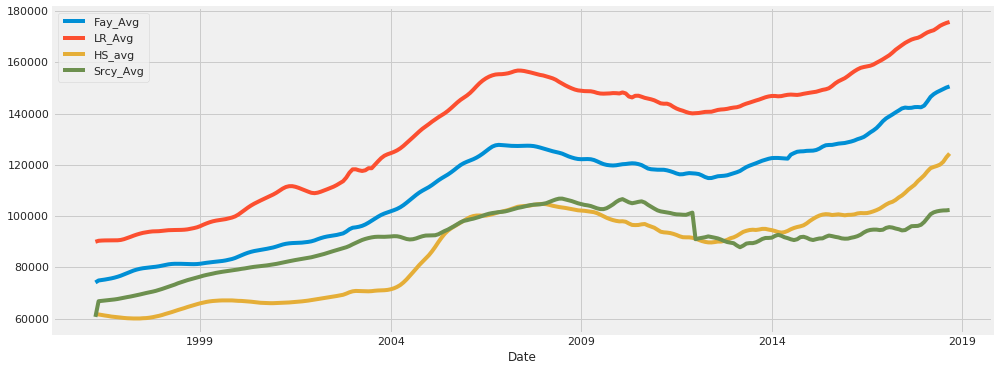

In [306]:
df2.plot(figsize=(15, 6))
plt.show()

# Decompose our time series into three distinct components Trend - Seasonality and Noise

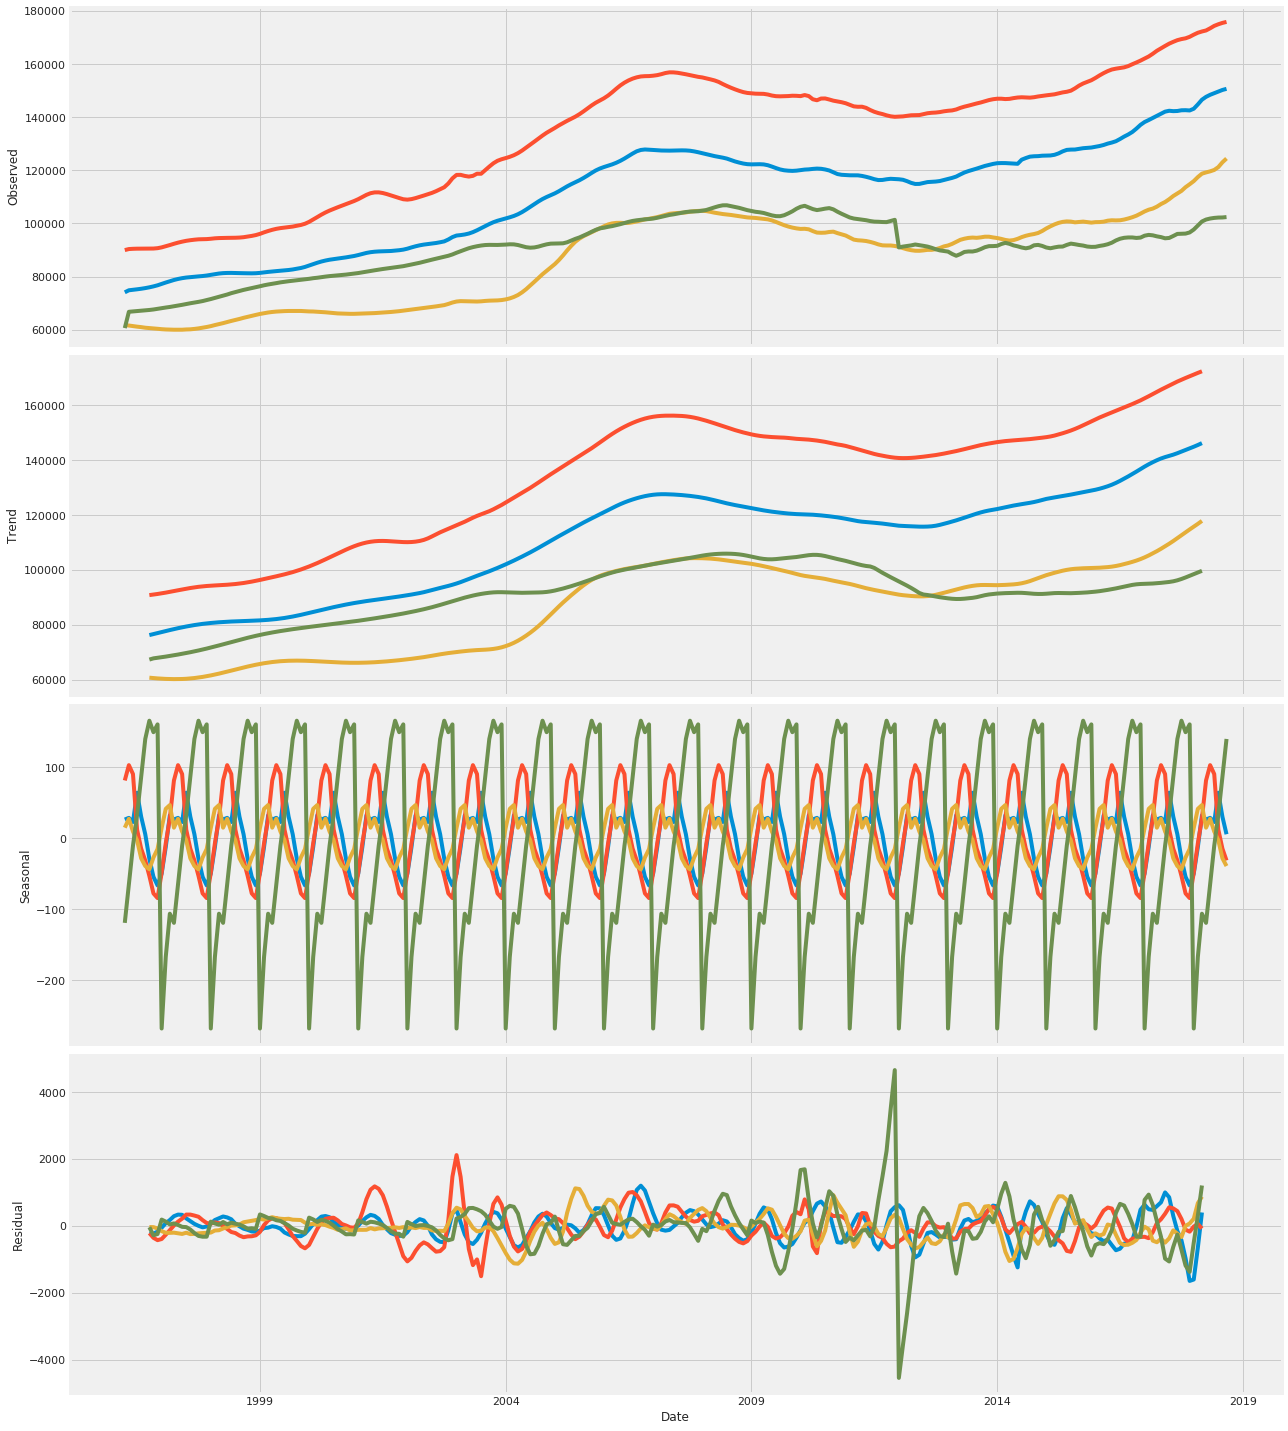

In [307]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 20
decomposition = sm.tsa.seasonal_decompose(df2, model='additive')
fig = decomposition.plot()
plt.show()

In [308]:
# Time Series With Arima
# PDQ are Seasonlity, Trend and Noise
import statsmodels.api as sm
print(sm.tsa.stattools.adfuller(df2['Fay_Avg']))
print(sm.tsa.stattools.adfuller(df2['LR_Avg']))
print(sm.tsa.stattools.adfuller(df2['HS_avg']))
print(sm.tsa.stattools.adfuller(df2['Srcy_Avg']))

#Fay_Avg	LR_Avg	HS_avg	Srcy_Avg

(-0.3246135299889338, 0.9219452548473418, 16, 253, {'1%': -3.4564641849494113, '5%': -2.873032730098417, '10%': -2.572894516864816}, 3360.0261791794196)
(-0.8764070180587551, 0.7956426134432366, 3, 266, {'1%': -3.455175292841607, '5%': -2.8724677563219485, '10%': -2.57259315846006}, 3460.0396040877313)
(-0.46743995772965324, 0.8982152913363975, 13, 256, {'1%': -3.4561550092339512, '5%': -2.8728972266578676, '10%': -2.5728222369384763}, 3265.3038189131203)
(-2.082928409371533, 0.2514343474929236, 1, 268, {'1%': -3.454988209954765, '5%': -2.8723857312734613, '10%': -2.572549407997327}, 4070.6915883780302)


In [309]:
from fbprophet import Prophet
df2.head()

,Fay_Avg,LR_Avg,HS_avg,Srcy_Avg
Date,,,,
1996-04-01,74089,89972,61775,60640
1996-05-01,74855,90357,61600,66767
1996-06-01,75024,90450,61375,66900
1996-07-01,75221,90497,61175,67050
1996-08-01,75426,90500,61000,67183


In [310]:
FData = df2.rename(columns={'Date': 'ds', 'Fay_Avg': 'y'})
FData=FData.reset_index()
FData.head(5)

,Date,y,LR_Avg,HS_avg,Srcy_Avg
0,1996-04-01,74089,89972,61775,60640
1,1996-05-01,74855,90357,61600,66767
2,1996-06-01,75024,90450,61375,66900
3,1996-07-01,75221,90497,61175,67050
4,1996-08-01,75426,90500,61000,67183


In [311]:
FData.count()

Date        270
y           270
LR_Avg      270
HS_avg      270
Srcy_Avg    270
dtype: int64

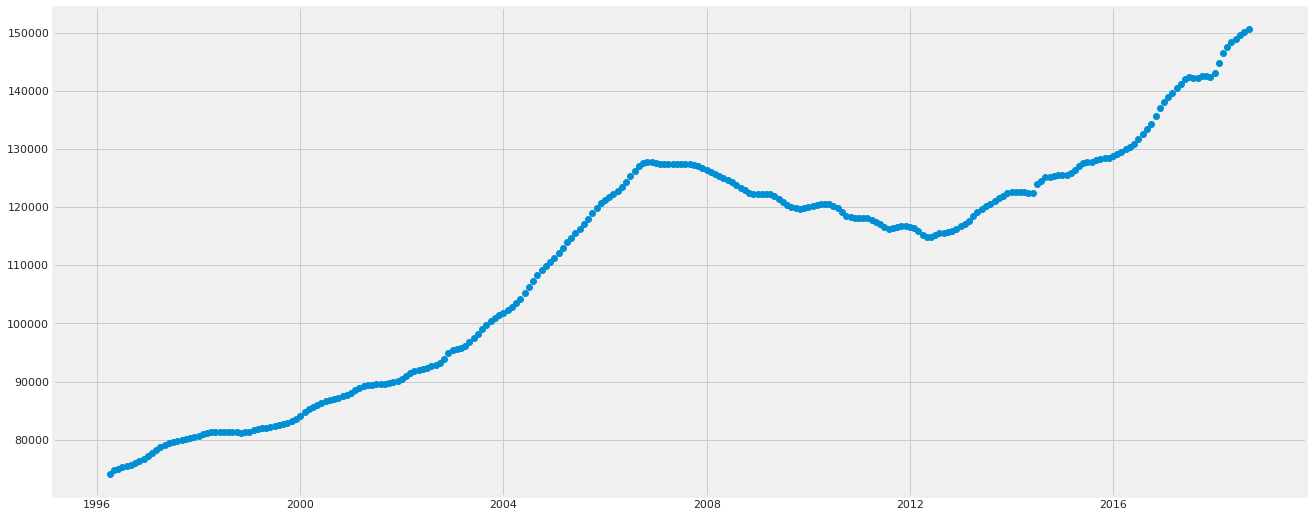

In [312]:
plt.figure(figsize=(20,9))
plt.plot_date(FData['Date'], y=FData['y'],xdate=True)

In [313]:
timeseries = FData['y']
FData = FData.rename(columns={'Date': 'ds', 'y': 'y'})
FData.head(5)

,ds,y,LR_Avg,HS_avg,Srcy_Avg
0,1996-04-01,74089,89972,61775,60640
1,1996-05-01,74855,90357,61600,66767
2,1996-06-01,75024,90450,61375,66900
3,1996-07-01,75221,90497,61175,67050
4,1996-08-01,75426,90500,61000,67183


In [314]:
from fbprophet import Prophet
my_model = Prophet(interval_width=0.95)
my_model.fit(FData)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [315]:
future_dates = my_model.make_future_dataframe(periods=12, freq='MS')
future_dates.tail()

,ds
277,2019-05-01
278,2019-06-01
279,2019-07-01
280,2019-08-01
281,2019-09-01


In [316]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
272,2018-12-01,149329.051335,147280.396986,151288.389752
273,2019-01-01,149799.781931,147798.299130,151710.644369
274,2019-02-01,150275.070915,148225.506966,152331.139571
275,2019-03-01,151190.499352,148900.697454,153181.177163
276,2019-04-01,151589.983954,149339.981179,153710.752234
277,2019-05-01,152005.901915,149687.102040,154191.500980
278,2019-06-01,152441.381380,149900.369656,154655.790056
279,2019-07-01,152945.810545,150436.628679,155249.473383
280,2019-08-01,153458.363523,150949.783982,156024.655873
281,2019-09-01,154050.176201,151151.002194,156589.451327


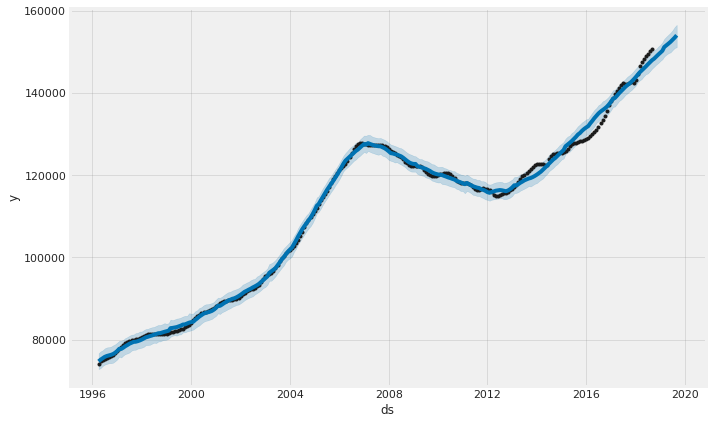

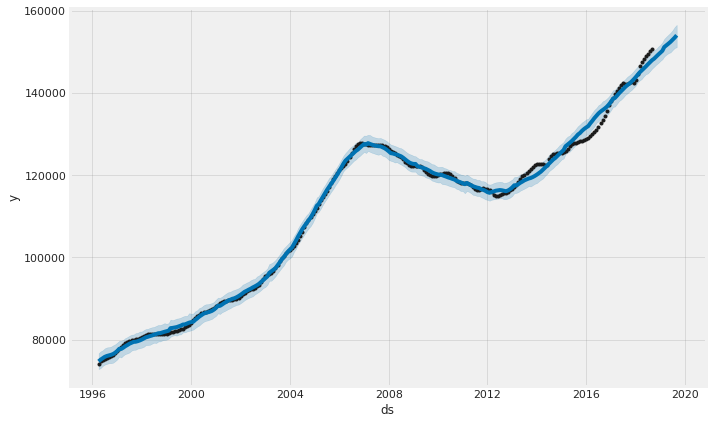

In [317]:
my_model.plot(forecast,uncertainty=True)

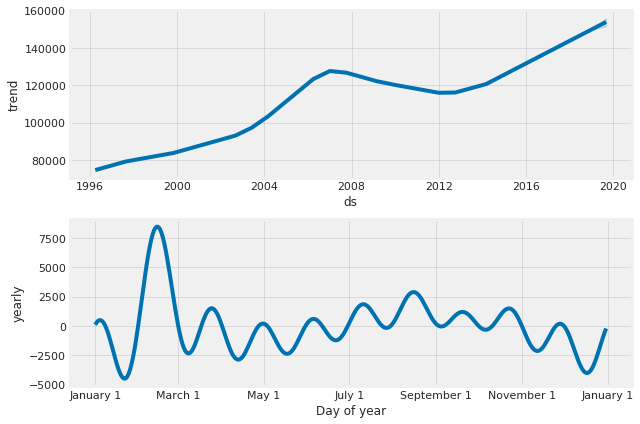

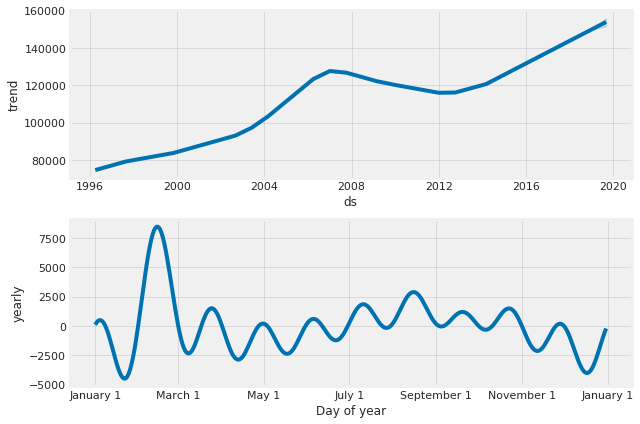

In [318]:
my_model.plot_components(forecast)

In [319]:
forecast.tail(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
272,2018-12-01,149301.799091,147280.396986,151288.389752,149060.135850,149564.653121,27.252244,27.252244,27.252244,27.252244,27.252244,27.252244,0.0,0.0,0.0,149329.051335
273,2019-01-01,149814.231990,147798.299130,151710.644369,149410.566395,150242.427738,-14.450059,-14.450059,-14.450059,-14.450059,-14.450059,-14.450059,0.0,0.0,0.0,149799.781931
274,2019-02-01,150326.664890,148225.506966,152331.139571,149738.613683,150935.755908,-51.593975,-51.593975,-51.593975,-51.593975,-51.593975,-51.593975,0.0,0.0,0.0,150275.070915
275,2019-03-01,150789.507509,148900.697454,153181.177163,150020.662942,151566.380023,400.991843,400.991843,400.991843,400.991843,400.991843,400.991843,0.0,0.0,0.0,151190.499352
276,2019-04-01,151301.940409,149339.981179,153710.752234,150290.056518,152294.573729,288.043546,288.043546,288.043546,288.043546,288.043546,288.043546,0.0,0.0,0.0,151589.983954
277,2019-05-01,151797.843215,149687.102040,154191.500980,150521.348660,152983.491063,208.058700,208.058700,208.058700,208.058700,208.058700,208.058700,0.0,0.0,0.0,152005.901915
278,2019-06-01,152310.276114,149900.369656,154655.790056,150695.075505,153727.750461,131.105266,131.105266,131.105266,131.105266,131.105266,131.105266,0.0,0.0,0.0,152441.381380
279,2019-07-01,152806.178920,150436.628679,155249.473383,150885.604268,154450.877576,139.631625,139.631625,139.631625,139.631625,139.631625,139.631625,0.0,0.0,0.0,152945.810545
280,2019-08-01,153318.611820,150949.783982,156024.655873,151142.639824,155167.871802,139.751703,139.751703,139.751703,139.751703,139.751703,139.751703,0.0,0.0,0.0,153458.363523
281,2019-09-01,153831.044720,151151.002194,156589.451327,151374.832025,155950.217794,219.131482,219.131482,219.131482,219.131482,219.131482,219.131482,0.0,0.0,0.0,154050.176201


In [320]:
#ds	y	LR_Avg	HS_avg	Srcy_Avg
LData = FData.rename(columns={'y': 'Fay_Avg', 'LR_Avg': 'y'})
LData.head(5)

,ds,Fay_Avg,y,HS_avg,Srcy_Avg
0,1996-04-01,74089,89972,61775,60640
1,1996-05-01,74855,90357,61600,66767
2,1996-06-01,75024,90450,61375,66900
3,1996-07-01,75221,90497,61175,67050
4,1996-08-01,75426,90500,61000,67183


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
272,2018-12-01,175837.021714,173512.343048,178159.941103,175474.441525,176231.097114,-37.294168,-37.294168,-37.294168,-37.294168,-37.294168,-37.294168,0.0,0.0,0.0,175799.727546
273,2019-01-01,176405.688665,173919.927825,178522.751604,175817.441212,177111.637491,-27.107478,-27.107478,-27.107478,-27.107478,-27.107478,-27.107478,0.0,0.0,0.0,176378.581186
274,2019-02-01,176974.355615,174578.874769,179383.174020,176137.865341,177921.175037,-21.427402,-21.427402,-21.427402,-21.427402,-21.427402,-21.427402,0.0,0.0,0.0,176952.928213
275,2019-03-01,177487.990280,175434.686352,180376.254842,176369.018503,178651.702462,370.156703,370.156703,370.156703,370.156703,370.156703,370.156703,0.0,0.0,0.0,177858.146983
276,2019-04-01,178056.657231,175748.697112,180809.969012,176652.840615,179503.005720,181.305513,181.305513,181.305513,181.305513,181.305513,181.305513,0.0,0.0,0.0,178237.962744
277,2019-05-01,178606.980086,176078.256502,181566.333052,176893.172538,180481.186673,160.739647,160.739647,160.739647,160.739647,160.739647,160.739647,0.0,0.0,0.0,178767.719733
278,2019-06-01,179175.647037,176563.331492,182469.926144,177019.187019,181406.171823,200.887687,200.887687,200.887687,200.887687,200.887687,200.887687,0.0,0.0,0.0,179376.534723
279,2019-07-01,179725.969892,176531.054727,183448.212170,177120.145720,182271.892999,53.495935,53.495935,53.495935,53.495935,53.495935,53.495935,0.0,0.0,0.0,179779.465827
280,2019-08-01,180294.636842,176600.381653,183954.805535,177302.348460,183248.973484,92.776404,92.776404,92.776404,92.776404,92.776404,92.776404,0.0,0.0,0.0,180387.413246
281,2019-09-01,180863.303793,177049.758786,185519.867623,177391.344591,184254.431853,147.327575,147.327575,147.327575,147.327575,147.327575,147.327575,0.0,0.0,0.0,181010.631368


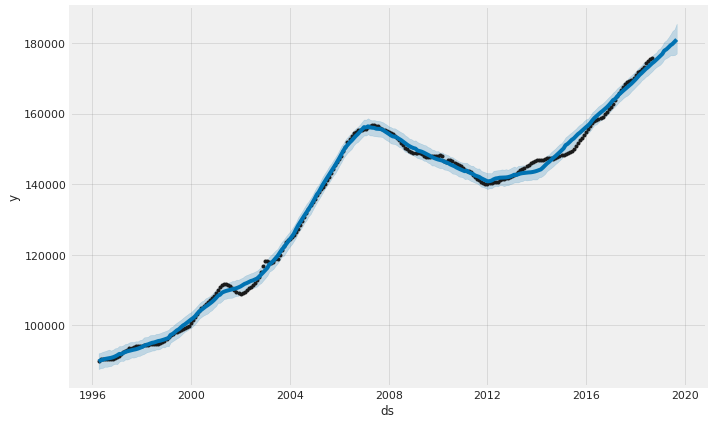

In [321]:
my_model2 = Prophet(interval_width=0.95)
my_model2.fit(LData)
future_dates2 = my_model2.make_future_dataframe(periods=12, freq='MS')
forecast2 = my_model2.predict(future_dates2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
my_model2.plot(forecast2,uncertainty=True)
forecast2.tail(10)

In [322]:
#ds	y	LR_Avg	HS_avg	Srcy_Avg
HData = FData.rename(columns={'y': 'LR_Avg', 'HS_avg': 'y'})
HData.head(5)

,ds,LR_Avg,LR_Avg,y,Srcy_Avg
0,1996-04-01,74089,89972,61775,60640
1,1996-05-01,74855,90357,61600,66767
2,1996-06-01,75024,90450,61375,66900
3,1996-07-01,75221,90497,61175,67050
4,1996-08-01,75426,90500,61000,67183


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
272,2018-12-01,118360.732555,115203.189991,121806.271356,118058.953583,118613.974104,73.785552,73.785552,73.785552,73.785552,73.785552,73.785552,0.0,0.0,0.0,118434.518108
273,2019-01-01,118820.866009,115443.002481,122159.209619,118316.595287,119297.023475,66.588897,66.588897,66.588897,66.588897,66.588897,66.588897,0.0,0.0,0.0,118887.454906
274,2019-02-01,119280.999464,115785.818962,122793.076927,118529.508216,119976.630826,-33.729326,-33.729326,-33.729326,-33.729326,-33.729326,-33.729326,0.0,0.0,0.0,119247.270137
275,2019-03-01,119696.603874,116766.915425,123576.903348,118689.798195,120589.863924,649.028137,649.028137,649.028137,649.028137,649.028137,649.028137,0.0,0.0,0.0,120345.632010
276,2019-04-01,120156.737328,116701.419854,124343.014057,118886.103644,121313.488367,366.590981,366.590981,366.590981,366.590981,366.590981,366.590981,0.0,0.0,0.0,120523.328309
277,2019-05-01,120602.027767,117011.833718,124479.908414,119092.354817,122081.489733,238.409250,238.409250,238.409250,238.409250,238.409250,238.409250,0.0,0.0,0.0,120840.437018
278,2019-06-01,121062.161221,117412.573136,125151.932037,119341.360071,122888.285889,158.101507,158.101507,158.101507,158.101507,158.101507,158.101507,0.0,0.0,0.0,121220.262728
279,2019-07-01,121507.451661,117501.372047,125594.702201,119476.554209,123570.127716,145.327671,145.327671,145.327671,145.327671,145.327671,145.327671,0.0,0.0,0.0,121652.779332
280,2019-08-01,121967.585115,118106.137979,125948.400468,119698.695834,124324.343990,269.647525,269.647525,269.647525,269.647525,269.647525,269.647525,0.0,0.0,0.0,122237.232640
281,2019-09-01,122427.718569,118584.374382,127082.771736,119904.658616,125259.118894,429.134015,429.134015,429.134015,429.134015,429.134015,429.134015,0.0,0.0,0.0,122856.852584


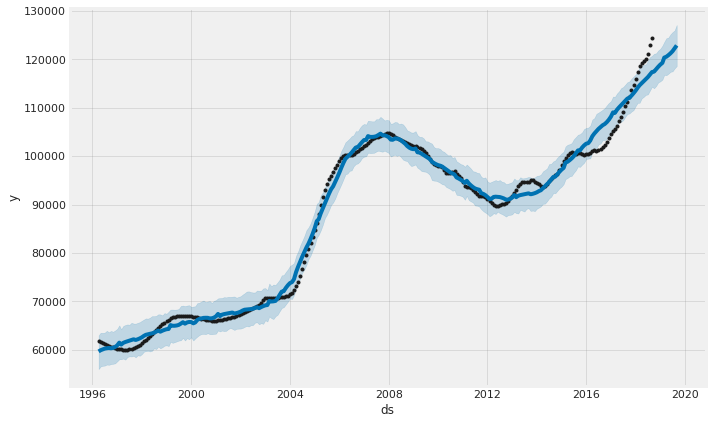

In [323]:
my_model3 = Prophet(interval_width=0.95)
my_model3.fit(HData)
future_dates3 = my_model3.make_future_dataframe(periods=12, freq='MS')
forecast3 = my_model3.predict(future_dates3)
forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
my_model3.plot(forecast3,uncertainty=True)
forecast3.tail(10)

In [324]:
#ds	y	LR_Avg	HS_avg	Srcy_Avg
SData = FData.rename(columns={'y': 'HS_avg', 'Srcy_Avg': 'y'})
SData.head(5)

,ds,HS_avg,LR_Avg,HS_avg,y
0,1996-04-01,74089,89972,61775,60640
1,1996-05-01,74855,90357,61600,66767
2,1996-06-01,75024,90450,61375,66900
3,1996-07-01,75221,90497,61175,67050
4,1996-08-01,75426,90500,61000,67183


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
272,2018-12-01,99508.329505,97349.416099,102598.640661,99295.121798,99649.108905,513.563075,513.563075,513.563075,513.563075,513.563075,513.563075,0.0,0.0,0.0,100021.892580
273,2019-01-01,99688.417395,96828.171141,102115.541742,99368.524450,99948.821751,-263.456791,-263.456791,-263.456791,-263.456791,-263.456791,-263.456791,0.0,0.0,0.0,99424.960604
274,2019-02-01,99868.505284,97151.970620,102305.591736,99384.407059,100268.428852,-166.699532,-166.699532,-166.699532,-166.699532,-166.699532,-166.699532,0.0,0.0,0.0,99701.805752
275,2019-03-01,100031.165314,97861.623220,103191.415268,99419.113745,100558.406108,485.958767,485.958767,485.958767,485.958767,485.958767,485.958767,0.0,0.0,0.0,100517.124081
276,2019-04-01,100211.253204,97899.633042,103512.296207,99468.129756,100914.370510,548.310754,548.310754,548.310754,548.310754,548.310754,548.310754,0.0,0.0,0.0,100759.563958
277,2019-05-01,100385.531807,97771.022990,103427.041218,99508.294594,101236.622313,143.502760,143.502760,143.502760,143.502760,143.502760,143.502760,0.0,0.0,0.0,100529.034567
278,2019-06-01,100565.619697,97939.588879,103472.667377,99466.732675,101603.781090,142.630040,142.630040,142.630040,142.630040,142.630040,142.630040,0.0,0.0,0.0,100708.249737
279,2019-07-01,100739.898300,98256.638637,103737.573324,99421.373117,101987.535750,202.265840,202.265840,202.265840,202.265840,202.265840,202.265840,0.0,0.0,0.0,100942.164140
280,2019-08-01,100919.986190,98391.206805,104076.871757,99427.190762,102356.304404,320.489689,320.489689,320.489689,320.489689,320.489689,320.489689,0.0,0.0,0.0,101240.475879
281,2019-09-01,101100.074080,98708.665578,104624.557445,99374.201211,102796.914012,430.953397,430.953397,430.953397,430.953397,430.953397,430.953397,0.0,0.0,0.0,101531.027477


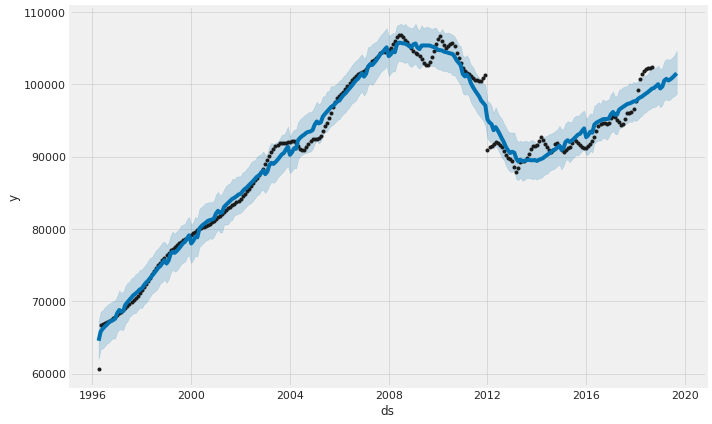

In [325]:
my_model4 = Prophet(interval_width=0.95)
my_model4.fit(SData)
future_dates4 = my_model4.make_future_dataframe(periods=12, freq='MS')
forecast4 = my_model4.predict(future_dates4)
forecast4[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
my_model4.plot(forecast4,uncertainty=True)
forecast4.tail(10)

# Model Forcasts for Each Region 2018

- Fayetteville $149301.79

- Little Rock $175837

- Hotsprings $118360.73

- Searcy $99508.32

### i used fbProphet to create forecast
unsure about how it downsamples

In [341]:
df = pd.read_csv("HousingAll.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df.head()

,All
Date,
1996-04-04,66900
1996-04-05,67150
1996-04-06,67300
1996-04-07,67550
1996-04-08,67700


In [342]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [343]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [345]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:7032.926205210194
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6555.870442337844
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:5480.325578731395
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:5228.930226159977
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:5488.103780581873
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:5437.505111964139
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:5188.800255494605
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:5170.3448572186335
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:6812.777507753553
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6880.692248893764
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:5183.633097530783
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:4879.449721647579
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:6494.072143692327
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:6445.581374940192
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:4854.880192508197
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:6429.695893036549
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:4461.239458273461
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:4249.151208786352
ARIMA(0, 

In [346]:
mod = sm.tsa.statespace.SARIMAX(df,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9018      0.027     33.706      0.000       0.849       0.954
ma.L1          0.5750      0.045     12.706      0.000       0.486       0.664
ar.S.L12       0.0336      0.020      1.722      0.085      -0.005       0.072
ma.S.L12      -0.9990      2.576     -0.388      0.698      -6.048       4.050
sigma2      7.594e+04   1.95e+05      0.390      0.697   -3.06e+05    4.58e+05


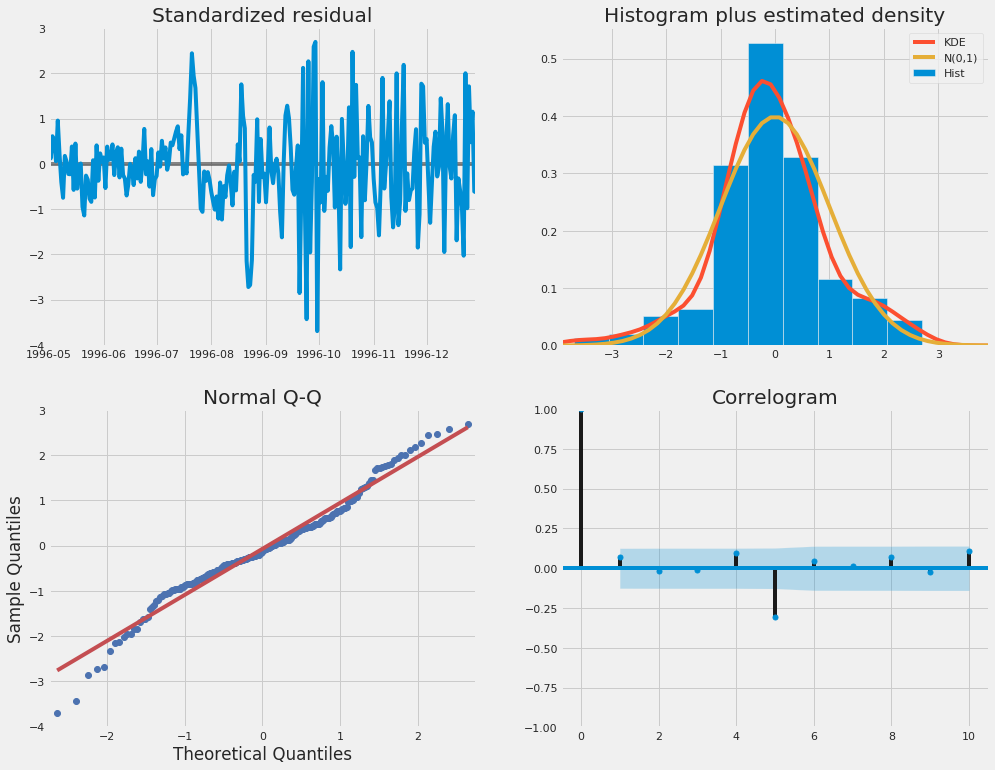

In [347]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [348]:
#validating forecast
pred = results.get_prediction(start=pd.to_datetime('2017-12-1'), dynamic=False)
pred_ci = pred.conf_int()

# Plot Map of Prices

In [4]:
import sys
!{sys.executable} -m pip install plotly
!{sys.executable} -m pip install geopandas
!{sys.executable} -m pip install pyshp
!{sys.executable} -m pip install shapely


You are using pip version 9.0.3, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 901kB 1.2MB/s 
    100% |████████████████████████████████| 1.5MB 845kB/s 
    100% |████████████████████████████████| 4.4MB 291kB/s 
    100% |████████████████████████████████| 17.8MB 75kB/s 
    100% |████████████████████████████████| 81kB 9.6MB/s 
  Running setup.py bdist_wheel for pyproj ... done
  Stored in directory: /mnt/pipelineai/users/caee941e/.cache/pip/wheels/89/77/ec/a537585d1022dafde0317dd19d33c4a30d4ee61e19f25ebd8e
  Running setup.py bdist_wheel for munch ... done
  Stored in directory: /mnt/pipelineai/users/caee941e/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built pyproj munch
You are using pip version 9.0.3, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |█████████████

In [9]:
import plotly.plotly as py
import plotly.figure_factory as ff
import shapefile
import geopandas
import shapely
import numpy as np
import pandas as pd

In [10]:
df_sample = pd.read_csv('laucnty16.csv')
df_sample['State FIPS Code'] = df_sample['State FIPS Code'].apply(lambda x: str(x).zfill(2))
df_sample['County FIPS Code'] = df_sample['County FIPS Code'].apply(lambda x: str(x).zfill(3))
df_sample['FIPS'] = df_sample['State FIPS Code'] + df_sample['County FIPS Code']

colorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
              "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
              "#08519c","#0b4083","#08306b"]
endpts = list(np.linspace(16000, 2491600, len(colorscale) - 1))
fips = df_sample['FIPS'].tolist()
values = df_sample['2018Price'].tolist()

fig = ff.create_choropleth(
    fips=fips, values=values, scope=['usa'],
    binning_endpoints=endpts, colorscale=colorscale,
    show_state_data=False,
    show_hover=True, centroid_marker={'opacity': 0},
    asp=2.9, title='Price Range Heatmap %',
    legend_title='Prices'
)
py.iplot(fig, filename='choropleth_full_usa')

ImportError: geopandas, pyshp and shapely must be installed for this figure factory.

Run the following commands to install the correct versions of the following modules:

```
pip install geopandas==0.3.0
pip install pyshp==1.2.10
pip install shapely==1.6.3
```
If you are using Windows, follow this post to properly install geopandas and dependencies:http://geoffboeing.com/2014/09/using-geopandas-windows/

If you are using Anaconda, do not use PIP to install the packages above. Instead use conda to install them:

```
conda install plotly
conda install geopandas
```